In [235]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc, confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [236]:
iris = pd.read_csv("Iris.csv")

In [237]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [238]:
iris.shape

(150, 6)

In [239]:
iris.info()
# So we don't need to do anything as there are zero null values in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [240]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [241]:
iris['Species'] = iris['Species'].astype('category')
iris['Species_cat'] = iris['Species'].cat.codes

In [242]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_cat
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [243]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_cat
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species_cat,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [244]:
# Just dropping Id column as it's irrelevant
iris.drop(['Id'], axis= 1, inplace=True)

In [245]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_cat
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [246]:
iris.describe()
# Really don't have any independent variable with almost zero variance (variance < 0.1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_cat
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Question 6

*Plot the scatter matrix for all the variables.*

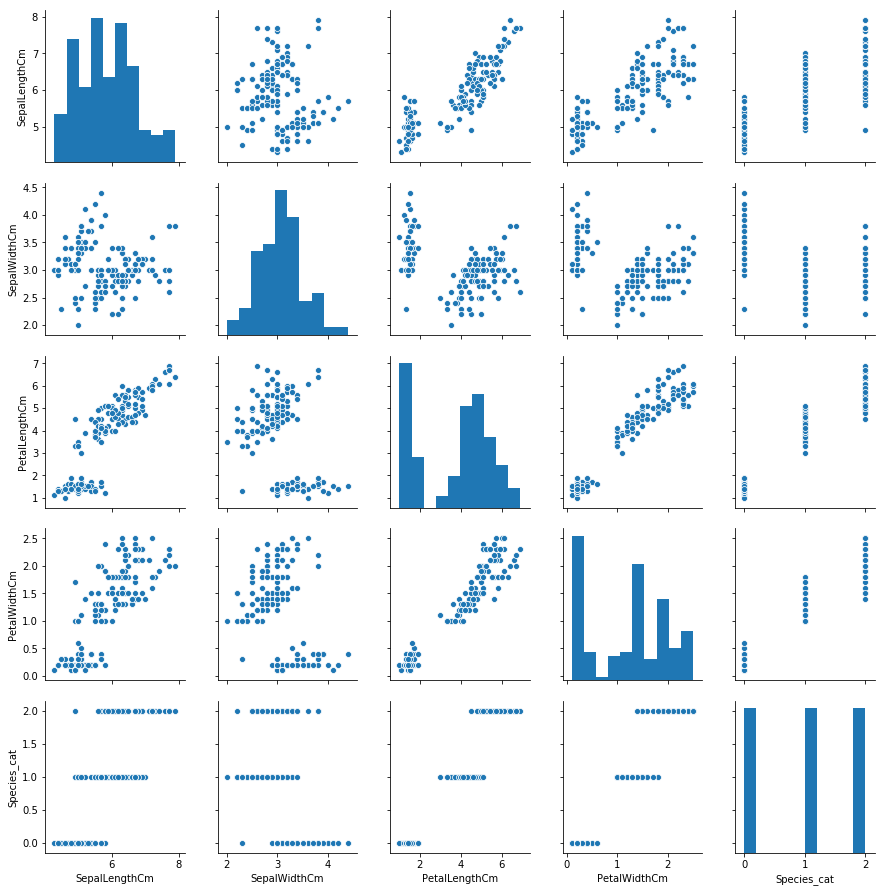

In [247]:
sns.pairplot(iris)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

#### KNN calculates Euclidean distance. So it's important to get all the predictors scaled to z-scores

In [248]:
X = iris.drop(['Species', 'Species_cat'], axis= 1)
X = X.apply(zscore)
y = iris['Species_cat']

In [249]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [250]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species_cat, dtype: int8

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [252]:
def build_compare_knn_classifier(klist, X_train, y_train, X_test, y_test):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    for k in klist:
        model_knn = KNeighborsClassifier(n_neighbors=k)
        model_knn.fit(X_train, y_train)
                
        y_pred = model_knn.predict(X_test)
        
        # Just manually doing recall, precision calculation for my future reference
        cm = confusion_matrix(y_test, y_pred)
        recall = np.diag(cm) / np.sum(cm, axis = 1)
        precision = np.diag(cm) / np.sum(cm, axis = 0)
    
        result['K={}'.format(k)] = [accuracy_score(y_test, y_pred), 
                         recall_score(y_test, y_pred, average='macro'),
                         precision_score(y_test, y_pred, average='macro'),
                         f1_score(y_test, y_pred, average='macro')]
    return result

In [253]:
klist = [3, 5, 9]
build_compare_knn_classifier(klist, X_train, y_train, X_test, y_test)

,K=3,K=5,K=9
Accuracy,1.0,1.0,1.0
Recall,1.0,1.0,1.0
Precision,1.0,1.0,1.0
F1 Score,1.0,1.0,1.0


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [254]:
def build_compare_knn_classifier_kfold_cv(klist, X, y):
    result = pd.DataFrame(index = ['Misclassification Error'])
    for k in klist:
        model_knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(model_knn, X, y, cv=5)
        
        result['K={}'.format(k)] = [1-scores.mean()]
    return result

In [255]:
klist = range(1, 20, 2)
compare_result = build_compare_knn_classifier_kfold_cv(klist, X, y)

print("Minimum classification error = ", compare_result.loc['Misclassification Error'].min(), ", ", compare_result.loc['Misclassification Error'].idxmin())
compare_result

Minimum classification error =  0.040000000000000036 ,  K=5


,K=1,K=3,K=5,K=7,K=9,K=11,K=13,K=15,K=17,K=19
Misclassification Error,0.053333,0.046667,0.04,0.046667,0.04,0.06,0.053333,0.053333,0.073333,0.046667


##### From above data it is obvious that with K=5, we get minimum classification errors.

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

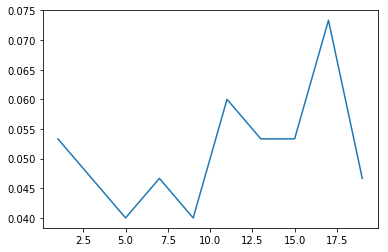

In [256]:
plt.plot(klist, compare_result.loc['Misclassification Error'])

In [257]:
# Additional work for my reference

In [258]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)                
y_pred = model_knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Naive Bayes with Iris Data

In [259]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [260]:
X = iris.drop(['Species', 'Species_cat'], axis= 1)
X = X.apply(zscore)
y = iris['Species_cat']

In [261]:
#Check the dataset
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [262]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species_cat, dtype: int8

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

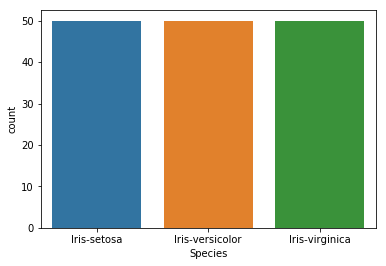

In [263]:
sns.countplot(iris['Species'])

In [264]:
#Drop Id variable from data
# Already this variable is dropped before

### Question 12 
Find Correlation among all variables and give your insights 

In [265]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [266]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_cat
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species_cat,0.782561,-0.419446,0.949043,0.956464,1.000000


In [267]:
# SepalLengthCm has high correlation with PetalLengthCm and PetalWidthCm. So let's keep SepalLengthCm and drop PetalLengthCm 
# & PetalWidthCm

X = iris.drop(['PetalLengthCm', 'PetalWidthCm', 'Species', 'Species_cat'], axis=1)
y = iris['Species_cat']

In [268]:
X.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [269]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species_cat, dtype: int8

### Split data in Training and test set in 80:20.

In [270]:
X = X.apply(zscore)

In [271]:
X.head()

,SepalLengthCm,SepalWidthCm
0,-0.900681,1.032057
1,-1.143017,-0.124958
2,-1.385353,0.337848
3,-1.506521,0.106445
4,-1.021849,1.263460


In [272]:
# This cell is only for my learning purpose. It tells that using StandardScaler and zscores product the same result.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
XOther = sc.transform(X)
XOther[0:5]

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019]])

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Question 13 
Do Feature Scaling 

In [274]:
# Use StandardScaler or similar methods

In [275]:
# Already done in previous question

### Question 14 
Train and Fit NaiveBayes Model

In [276]:
#Fit the model
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [277]:
#Predict
y_pred = model_gnb.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [281]:
accuracy_score(y_test, y_pred)

0.9

In [279]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  7,  2],
       [ 0,  1, 10]], dtype=int64)

In [ ]:
# KNN - With K=5 figured out using Cross Validation, we got Misclassification Error 4%
# While Naive Bayes gives Misclassification Error as almost 10%.
# So it looks like for given data set, KNN works better.